In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from astropy.io import fits
import os
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np # Import numpy for float64

In [3]:
from astropy.io import fits
import os
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np # Import numpy for float64
# Re-open the FITS file to access the data, as the previous 'with' block would have closed it
file_path = '/content/drive/MyDrive/Hos/Hos5/Env_colors_Task1/SDSS_EnvCatalogue.fits'
#open the file
qsolist=fits.open(file_path)

print("Available HDUs:")
for i, hdu in enumerate(qsolist):
    print(f"HDU {i}: {hdu.name} ({hdu.__class__.__name__})")

# Let's inspect the first data HDU (assuming it's at index 1 for typical FITS files)
if len(qsolist) > 1 and isinstance(qsolist[1], fits.BinTableHDU):
    print("\n--- Header of the first data HDU (HDU 1) ---")
    print(repr(qsolist[1].header))
    print("\n--- Column names in the first data HDU (HDU 1) ---")
    if qsolist[1].columns:
        print(qsolist[1].columns.names)
    else:
        print("No columns found in this HDU.")
elif len(qsolist) > 0:
    print("\n--- Header of the primary HDU (HDU 0) ---")
    print(repr(qsolist[0].header))
    print("\n--- No data columns to display for the primary HDU or non-BinTableHDU ---")
else:
    print("\nNo HDUs found in the FITS file.")

qsolist.close()


Available HDUs:
HDU 0: PRIMARY (PrimaryHDU)
HDU 1: Joined (BinTableHDU)

--- Header of the first data HDU (HDU 1) ---
XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  104 / width of table in bytes                        
NAXIS2  =                19344 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   18 / number of columns                              
EXTNAME = 'Joined  '           / table name                                     
TTYPE1  = 'OBJID   '           / label for column 1                             
TFORM1  = 'K       '           / format for column 1                    

In [4]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Define the file path (already available from previous cells)
file_path = '/content/drive/MyDrive/Hos/Hos5/Env_colors_Task1/SDSS_EnvCatalogue.fits'

# Open the FITS file
with fits.open(file_path) as hdul:
    # Assuming the data is in the second HDU (index 1), which is a BinTableHDU as identified before
    data = hdul[1].data

    # Create an empty dictionary to hold column data in native byte order
    df_dict = {}
    for col_name in data.names:
        # Convert column data to native byte order using astype on the dtype
        # This handles both the deprecation of newbyteorder() and ensures correct byte order for pandas.
        df_dict[col_name] = data[col_name].astype(data[col_name].dtype.newbyteorder('='))

    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(df_dict)

# Display the first few rows and column names to confirm data loading
print("DataFrame head:")
display(df.head())
print("\nDataFrame columns:")
display(df.columns)

DataFrame head:


,OBJID,Ra,Dec,ssfr,mass,dens_05,redshift,Mag_r,up,up_err,gp,gp_err,rp,rp_err,ip,ip_err,zp,zp_err
0,1237657776084419331,146.626633,46.534737,-9.665319,9.356761,0.000000,0.027304,-19.220900,17.623806,0.056527,24.995678,9.915442,16.157999,0.020152,15.942792,0.024391,16.038082,0.057954
1,1237657776615718955,131.939056,39.536346,-12.213370,10.763674,1.750704,0.029083,-21.318100,16.799978,0.028992,14.933827,0.020861,14.161912,0.019618,13.771965,0.017933,13.622497,0.009697
2,1237657776616505540,133.678787,40.701977,-11.434450,9.878876,6.441094,0.028747,-19.214300,18.671124,0.049311,16.988434,0.013374,16.236887,0.013438,15.884276,0.014278,15.719749,0.018026
3,1237657776616833062,134.574737,41.118305,-9.236259,9.081891,0.000000,0.028611,-18.752199,17.881176,0.018995,16.975447,0.009616,16.678471,0.012009,16.490271,0.014652,16.429703,0.022935
4,1237655469134119405,224.593643,2.127635,-10.094170,8.896400,0.000000,0.029286,-17.975401,18.911779,0.171888,17.987066,0.037184,17.517307,0.048150,17.407066,0.037224,17.682642,0.353800



DataFrame columns:


Index(['OBJID', 'Ra', 'Dec', 'ssfr', 'mass', 'dens_05', 'redshift', 'Mag_r',
       'up', 'up_err', 'gp', 'gp_err', 'rp', 'rp_err', 'ip', 'ip_err', 'zp',
       'zp_err'],
      dtype='object')

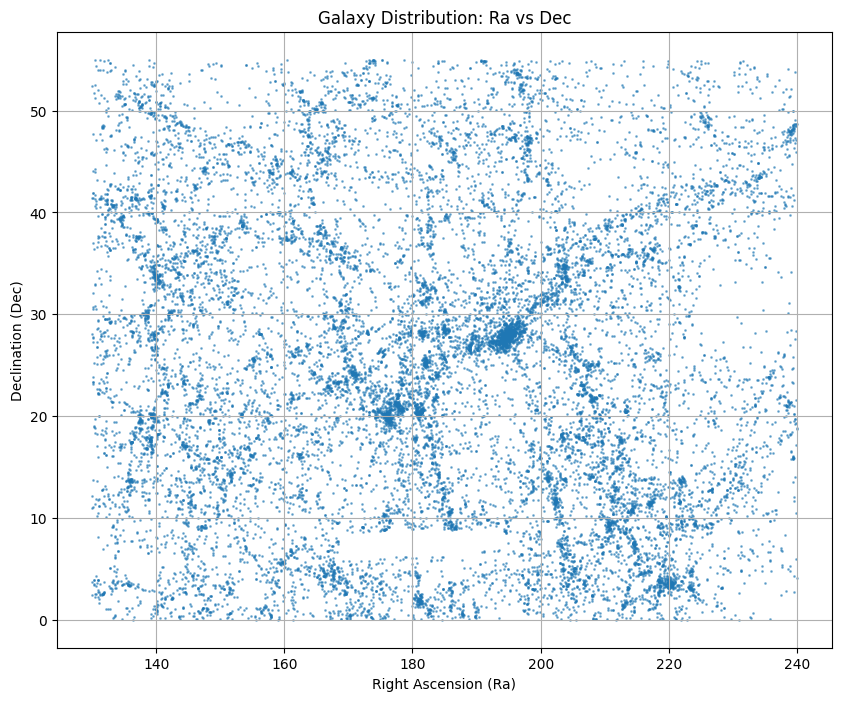

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Check for NaN or infinite values in 'Ra' and 'Dec'
# and remove rows containing them
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Ra', 'Dec'])

# Create the scatter plot of Ra vs Dec using the cleaned DataFrame
plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned['Ra'], df_cleaned['Dec'], s=1, alpha=0.5)
plt.xlabel('Right Ascension (Ra)')
plt.ylabel('Declination (Dec)')
plt.title('Galaxy Distribution: Ra vs Dec')
plt.grid(True)
plt.show()


In [6]:
ra_min = df_cleaned['Ra'].min()
ra_max = df_cleaned['Ra'].max()
dec_min = df_cleaned['Dec'].min()
dec_max = df_cleaned['Dec'].max()

print(f"Minimum Right Ascension (Ra): {ra_min}")
print(f"Maximum Right Ascension (Ra): {ra_max}")
print(f"Minimum Declination (Dec): {dec_min}")
print(f"Maximum Declination (Dec): {dec_max}")

Minimum Right Ascension (Ra): 130.0015564
Maximum Right Ascension (Ra): 239.9587097
Minimum Declination (Dec): 0.0001625
Maximum Declination (Dec): 54.9989014


In [7]:
dec_min_rad = np.radians(dec_min)
dec_max_rad = np.radians(dec_max)
ra_range_rad = np.radians(ra_max - ra_min)

print(f"Minimum Declination (radians): {dec_min_rad}")
print(f"Maximum Declination (radians): {dec_max_rad}")
print(f"Right Ascension Range (radians): {ra_range_rad}")

Minimum Declination (radians): 2.8361600344907854e-06
Maximum Declination (radians): 0.9599119144097189
Right Ascension Range (radians): 1.9191143612051484


In [8]:
solid_angle = ra_range_rad * (np.sin(dec_max_rad) - np.sin(dec_min_rad))

print(f"Calculated Solid Angle (steradians): {solid_angle}")

Calculated Solid Angle (steradians): 1.5720199028463309


In [9]:
redshift_min = df_cleaned['redshift'].min()
redshift_max = df_cleaned['redshift'].max()

print(f"Minimum Redshift: {redshift_min}")
print(f"Maximum Redshift: {redshift_max}")

Minimum Redshift: 0.0150032
Maximum Redshift: 0.0299997


In [10]:
from astropy.cosmology import FlatLambdaCDM

# Define a standard cosmological model
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

print(f"Cosmological Model: {cosmo}")

Cosmological Model: FlatLambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=0.0)


In [11]:
comoving_dist_min = cosmo.comoving_distance(redshift_min).to_value('Mpc')
comoving_dist_max = cosmo.comoving_distance(redshift_max).to_value('Mpc')

print(f"Minimum Comoving Distance: {comoving_dist_min:.2f} Mpc")
print(f"Maximum Comoving Distance: {comoving_dist_max:.2f} Mpc")

Minimum Comoving Distance: 64.04 Mpc
Maximum Comoving Distance: 127.61 Mpc


In [12]:
total_comoving_volume = (solid_angle / 3) * (comoving_dist_max**3 - comoving_dist_min**3)

print(f"Total Comoving Volume: {total_comoving_volume:.2f} Mpc^3")

Total Comoving Volume: 951263.61 Mpc^3


In [13]:
# Calculate the total number of galaxies
total_galaxies = len(df_cleaned)

# Calculate the number density
number_density = total_galaxies / total_comoving_volume

print(f"Total Number of Galaxies: {total_galaxies}")
print(f"Total Comoving Volume: {total_comoving_volume:.2f} Mpc^3")
print(f"Number Density of Galaxies: {number_density:.2e} galaxies/Mpc^3")


Total Number of Galaxies: 19344
Total Comoving Volume: 951263.61 Mpc^3
Number Density of Galaxies: 2.03e-02 galaxies/Mpc^3


In [14]:
velocity_difference = 2000 # km/s
H0 = cosmo.H0.value # H0 is already in km/s/Mpc

cylinder_depth = velocity_difference / H0

print(f"Cylinder Depth: {cylinder_depth:.2f} Mpc")

Cylinder Depth: 28.57 Mpc


In [15]:
cylinder_radius = 0.5 # Mpc
cylinder_volume = np.pi * (cylinder_radius**2) * cylinder_depth
cylinder_volume =  cylinder_depth
print(f"Cylinder Volume: {cylinder_volume:.2f} Mpc^3")

Cylinder Volume: 28.57 Mpc^3


In [16]:
mean_galaxy_density = number_density * cylinder_volume

print(f"Mean Density of Galaxies (< Σ >): {mean_galaxy_density:.2e} galaxies/Mpc^3")

Mean Density of Galaxies (< Σ >): 5.81e-01 galaxies/Mpc^3


In [18]:
df_cleaned['comoving_dist'] = cosmo.comoving_distance(df_cleaned['redshift']).to_value('Mpc')

print("First 5 rows of df_cleaned with new 'comoving_dist' column:")
display(df_cleaned.head())

First 5 rows of df_cleaned with new 'comoving_dist' column:


,OBJID,Ra,Dec,ssfr,mass,dens_05,redshift,Mag_r,up,up_err,gp,gp_err,rp,rp_err,ip,ip_err,zp,zp_err,comoving_dist
0,1237657776084419331,146.626633,46.534737,-9.665319,9.356761,0.000000,0.027304,-19.220900,17.623806,0.056527,24.995678,9.915442,16.157999,0.020152,15.942792,0.024391,16.038082,0.057954,116.214114
1,1237657776615718955,131.939056,39.536346,-12.213370,10.763674,1.750704,0.029083,-21.318100,16.799978,0.028992,14.933827,0.020861,14.161912,0.019618,13.771965,0.017933,13.622497,0.009697,123.734769
2,1237657776616505540,133.678787,40.701977,-11.434450,9.878876,6.441094,0.028747,-19.214300,18.671124,0.049311,16.988434,0.013374,16.236887,0.013438,15.884276,0.014278,15.719749,0.018026,122.314235
3,1237657776616833062,134.574737,41.118305,-9.236259,9.081891,0.000000,0.028611,-18.752199,17.881176,0.018995,16.975447,0.009616,16.678471,0.012009,16.490271,0.014652,16.429703,0.022935,121.739365
4,1237655469134119405,224.593643,2.127635,-10.094170,8.896400,0.000000,0.029286,-17.975401,18.911779,0.171888,17.987066,0.037184,17.517307,0.048150,17.407066,0.037224,17.682642,0.353800,124.591379


---

In [19]:
df_cleaned['sigma_i'] = df_cleaned['dens_05']

print("First 5 rows of df_cleaned with new 'sigma_i' column:")
display(df_cleaned.head())

First 5 rows of df_cleaned with new 'sigma_i' column:


,OBJID,Ra,Dec,ssfr,mass,dens_05,redshift,Mag_r,up,up_err,gp,gp_err,rp,rp_err,ip,ip_err,zp,zp_err,comoving_dist,sigma_i
0,1237657776084419331,146.626633,46.534737,-9.665319,9.356761,0.000000,0.027304,-19.220900,17.623806,0.056527,24.995678,9.915442,16.157999,0.020152,15.942792,0.024391,16.038082,0.057954,116.214114,0.000000
1,1237657776615718955,131.939056,39.536346,-12.213370,10.763674,1.750704,0.029083,-21.318100,16.799978,0.028992,14.933827,0.020861,14.161912,0.019618,13.771965,0.017933,13.622497,0.009697,123.734769,1.750704
2,1237657776616505540,133.678787,40.701977,-11.434450,9.878876,6.441094,0.028747,-19.214300,18.671124,0.049311,16.988434,0.013374,16.236887,0.013438,15.884276,0.014278,15.719749,0.018026,122.314235,6.441094
3,1237657776616833062,134.574737,41.118305,-9.236259,9.081891,0.000000,0.028611,-18.752199,17.881176,0.018995,16.975447,0.009616,16.678471,0.012009,16.490271,0.014652,16.429703,0.022935,121.739365,0.000000
4,1237655469134119405,224.593643,2.127635,-10.094170,8.896400,0.000000,0.029286,-17.975401,18.911779,0.171888,17.987066,0.037184,17.517307,0.048150,17.407066,0.037224,17.682642,0.353800,124.591379,0.000000


In [20]:
df_cleaned['delta'] = df_cleaned['sigma_i'] / mean_galaxy_density
df_cleaned['log10_1_plus_delta'] = np.log10(1 + df_cleaned['delta'])

print("First 5 rows of df_cleaned with new 'delta' and 'log10_1_plus_delta' columns:")
display(df_cleaned.head())

First 5 rows of df_cleaned with new 'delta' and 'log10_1_plus_delta' columns:


,OBJID,Ra,Dec,ssfr,mass,dens_05,redshift,Mag_r,up,up_err,...,rp,rp_err,ip,ip_err,zp,zp_err,comoving_dist,sigma_i,delta,log10_1_plus_delta
0,1237657776084419331,146.626633,46.534737,-9.665319,9.356761,0.000000,0.027304,-19.220900,17.623806,0.056527,...,16.157999,0.020152,15.942792,0.024391,16.038082,0.057954,116.214114,0.000000,0.000000,0.000000
1,1237657776615718955,131.939056,39.536346,-12.213370,10.763674,1.750704,0.029083,-21.318100,16.799978,0.028992,...,14.161912,0.019618,13.771965,0.017933,13.622497,0.009697,123.734769,1.750704,3.013252,0.603496
2,1237657776616505540,133.678787,40.701977,-11.434450,9.878876,6.441094,0.028747,-19.214300,18.671124,0.049311,...,16.236887,0.013438,15.884276,0.014278,15.719749,0.018026,122.314235,6.441094,11.086189,1.082289
3,1237657776616833062,134.574737,41.118305,-9.236259,9.081891,0.000000,0.028611,-18.752199,17.881176,0.018995,...,16.678471,0.012009,16.490271,0.014652,16.429703,0.022935,121.739365,0.000000,0.000000,0.000000
4,1237655469134119405,224.593643,2.127635,-10.094170,8.896400,0.000000,0.029286,-17.975401,18.911779,0.171888,...,17.517307,0.048150,17.407066,0.037224,17.682642,0.353800,124.591379,0.000000,0.000000,0.000000


In [21]:
print("Valori della colonna 'log10_1_plus_delta':")
display(df_cleaned['log10_1_plus_delta'])

Valori della colonna 'log10_1_plus_delta':


,log10_1_plus_delta
0,0.000000
1,0.603496
2,1.082289
3,0.000000
4,0.000000
...,...
19339,0.000000
19340,0.000000
19341,0.000000
19342,0.773112


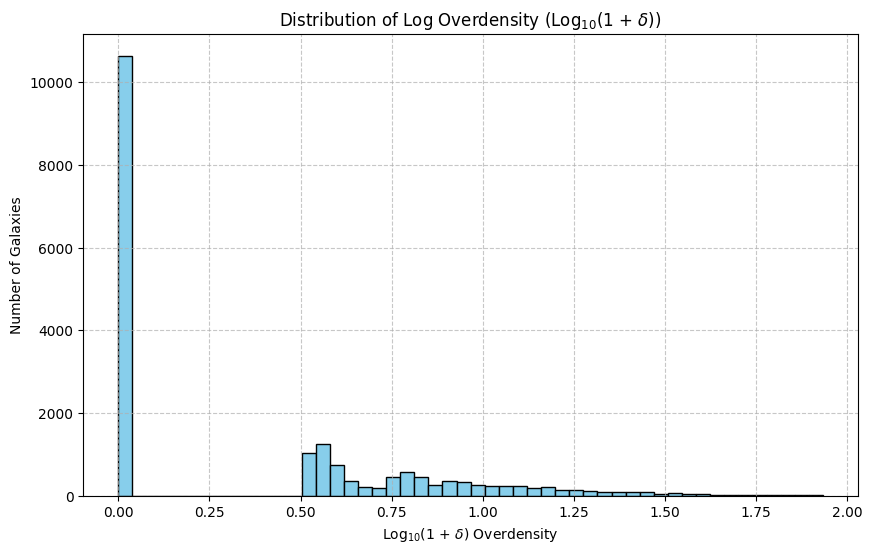

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['log10_1_plus_delta'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel(r'Log$_{10}$(1 + $\delta$) Overdensity') # Using raw string
plt.ylabel('Number of Galaxies')
plt.title(r'Distribution of Log Overdensity (Log$_{10}$(1 + $\delta$))') # Using raw string
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [23]:
print("Descriptive statistics for new columns:")
display(df_cleaned[['sigma_i', 'delta', 'log10_1_plus_delta']].describe())

Descriptive statistics for new columns:


,sigma_i,delta,log10_1_plus_delta
count,19344.000000,19344.000000,19344.000000
mean,2.131527,3.668712,0.377105
std,4.303525,7.407078,0.461881
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,2.667740,4.591622,0.747538
max,49.231926,84.736295,1.933165


In [24]:
quantile_edges = df_cleaned['log10_1_plus_delta'].quantile([0.25, 0.5, 0.75])

# Define bins, including the min and max values of the column
bins = [-np.inf] + quantile_edges.tolist() + [np.inf]

# Define labels for the bins
# Adjust labels as duplicates will result in 3 bins if 0.25 and 0.5 quantiles are the same
labels = ['Bin 1 (Low)', 'Bin 2 (Medium)', 'Bin 3 (High)']

df_cleaned['overdensity_bin'] = pd.cut(
    df_cleaned['log10_1_plus_delta'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    duplicates='drop' # Add this to handle non-unique bin edges
)

print("Quantile Edges for 'log10_1_plus_delta':")
print(quantile_edges)

print("\nValue counts for 'overdensity_bin':")
print(df_cleaned['overdensity_bin'].value_counts())

Quantile Edges for 'log10_1_plus_delta':
0.25    0.000000
0.50    0.000000
0.75    0.747538
Name: log10_1_plus_delta, dtype: float64

Value counts for 'overdensity_bin':
overdensity_bin
Bin 1 (Low)       10643
Bin 3 (High)       4832
Bin 2 (Medium)     3869
Name: count, dtype: int64


In [25]:
# Define explicit bin edges as requested by the user
bins = [-np.inf, 0.001, 0.75, 1, 1.25, np.inf]

# Define labels for the bins based on the new ranges
labels = ['Bin 1 (0-0.001)', 'Bin 2 (0.001-0.75)', 'Bin 3 (0.75-1.0)',  'Bin 4 (1-1.2)',  'Bin 5 (1.2-1.5)']

df_cleaned['overdensity_bin'] = pd.cut(
    df_cleaned['log10_1_plus_delta'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    duplicates='drop' # Keep this to handle any potential non-unique edges if min/max coincide with bin edges
)

print("Defined Bins for 'log10_1_plus_delta':")
print(bins)

print("\nValue counts for 'overdensity_bin':")
print(df_cleaned['overdensity_bin'].value_counts())

Defined Bins for 'log10_1_plus_delta':
[-inf, 0.001, 0.75, 1, 1.25, inf]

Value counts for 'overdensity_bin':
overdensity_bin
Bin 1 (0-0.001)       10643
Bin 2 (0.001-0.75)     3891
Bin 3 (0.75-1.0)       2524
Bin 4 (1-1.2)          1379
Bin 5 (1.2-1.5)         907
Name: count, dtype: int64


In [26]:
df_cleaned['gp-ip'] = df_cleaned['gp'] - df_cleaned['ip']

print("First 5 rows of df_cleaned with new 'gp-ip' column:")
display(df_cleaned.head())

First 5 rows of df_cleaned with new 'gp-ip' column:


,OBJID,Ra,Dec,ssfr,mass,dens_05,redshift,Mag_r,up,up_err,...,ip,ip_err,zp,zp_err,comoving_dist,sigma_i,delta,log10_1_plus_delta,overdensity_bin,gp-ip
0,1237657776084419331,146.626633,46.534737,-9.665319,9.356761,0.000000,0.027304,-19.220900,17.623806,0.056527,...,15.942792,0.024391,16.038082,0.057954,116.214114,0.000000,0.000000,0.000000,Bin 1 (0-0.001),9.052886
1,1237657776615718955,131.939056,39.536346,-12.213370,10.763674,1.750704,0.029083,-21.318100,16.799978,0.028992,...,13.771965,0.017933,13.622497,0.009697,123.734769,1.750704,3.013252,0.603496,Bin 2 (0.001-0.75),1.161862
2,1237657776616505540,133.678787,40.701977,-11.434450,9.878876,6.441094,0.028747,-19.214300,18.671124,0.049311,...,15.884276,0.014278,15.719749,0.018026,122.314235,6.441094,11.086189,1.082289,Bin 4 (1-1.2),1.104157
3,1237657776616833062,134.574737,41.118305,-9.236259,9.081891,0.000000,0.028611,-18.752199,17.881176,0.018995,...,16.490271,0.014652,16.429703,0.022935,121.739365,0.000000,0.000000,0.000000,Bin 1 (0-0.001),0.485176
4,1237655469134119405,224.593643,2.127635,-10.094170,8.896400,0.000000,0.029286,-17.975401,18.911779,0.171888,...,17.407066,0.037224,17.682642,0.353800,124.591379,0.000000,0.000000,0.000000,Bin 1 (0-0.001),0.580000


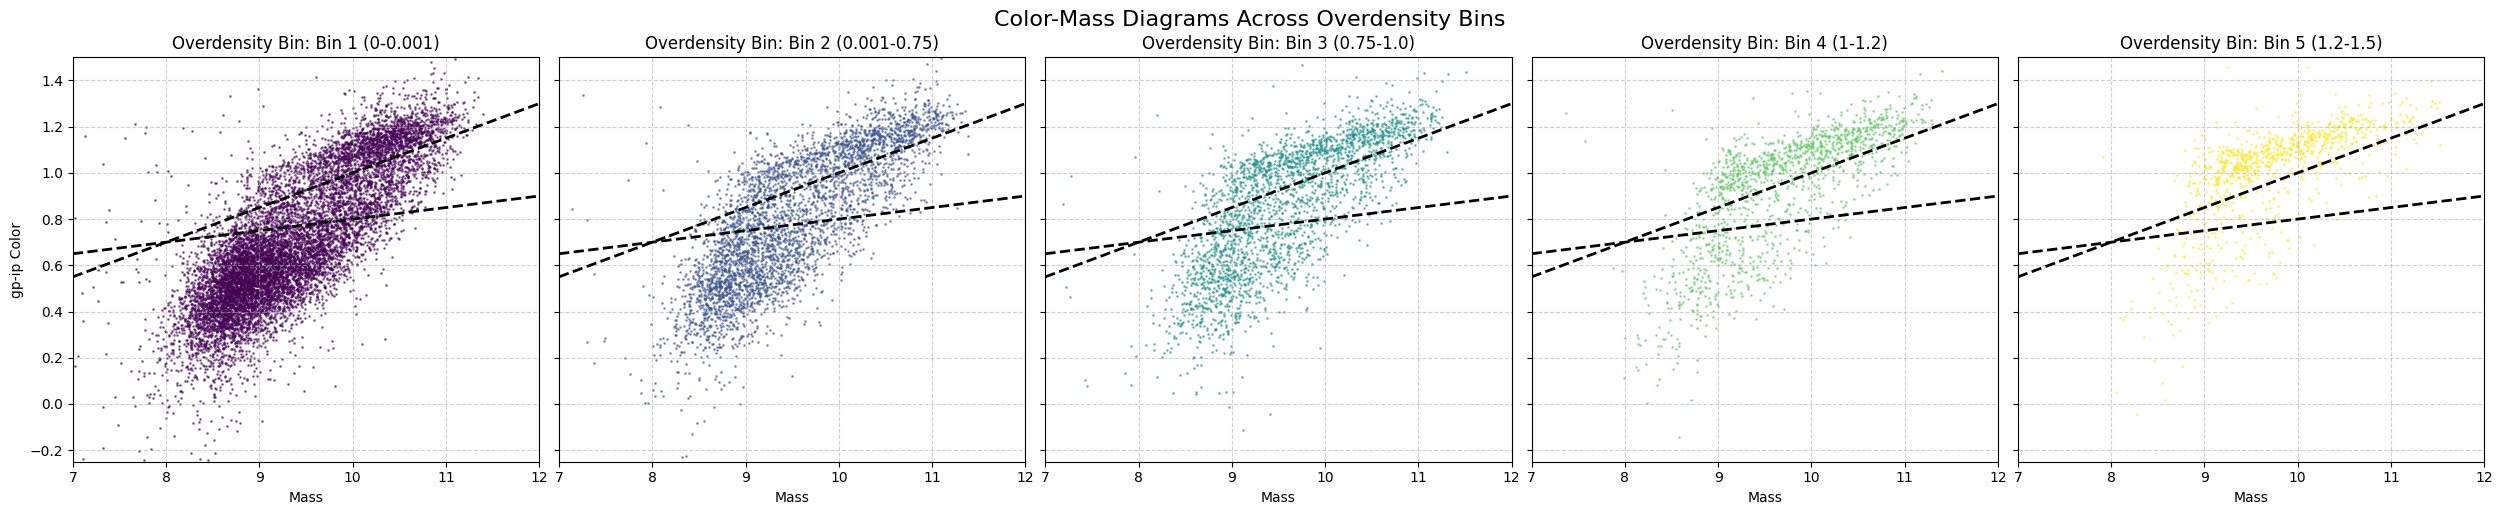

In [27]:
unique_bins = df_cleaned['overdensity_bin'].unique()
num_bins = len(unique_bins)

# Sort the bins to ensure consistent plotting order
unique_bins = sorted(unique_bins, key=lambda x: str(x))

# Create a figure and a set of subplots
# Adjust figsize dynamically based on the number of bins
fig, axes = plt.subplots(1, num_bins, figsize=(num_bins * 5, 5), sharey=True, sharex=True)

# Ensure axes is an array even if there's only one subplot
if num_bins == 1:
    axes = [axes]

# Define colors for plots (optional, but good for distinction)
colors = plt.cm.viridis(np.linspace(0, 1, num_bins))

# Define the diagonal line properties *before* the loop, but re-evaluate its formula
x_diagonal = np.linspace(7, 12) # Use the same x-range as the plot
# The current formula `y_diagonal = 10 * x_diagonal + 0.59` results in values far outside the y-limits (-0.25 to 1.5).
# Please provide the correct formula for the diagonal line (gp-ip vs. mass) if it's different,
# or adjust the coefficients to fit within the y-range of your plots.
# For now, I'll use a placeholder line that *might* be visible, but you should adjust this.
y_diagonal = 0.15 * x_diagonal - 0.50 # Placeholder: adjust these coefficients as needed!

x_diagonal = np.linspace(7, 12) # Use the same x-range as the plot
# The current formula `y_diagonal = 10 * x_diagonal + 0.59` results in values far outside the y-limits (-0.25 to 1.5).
# Please provide the correct formula for the diagonal line (gp-ip vs. mass) if it's different,
# or adjust the coefficients to fit within the y-range of your plots.
# For now, I'll use a placeholder line that *might* be visible, but you should adjust this.
y_diagonal2 = 0.05 * x_diagonal + 0.3 # Placeholder: adjust these coefficients as needed!
#red_mask = (
#            (bin_data['gp-ip'] > data['mass'] * 0.15 - 0.5) &
#            (bin_data['UmV'] > 1.3) &
#            (bin_data['VmJ'] < 1.6)
#        )
#green_mask = (
#            (bin_data['gp-ip'] < data['mass'] * 0.15 - 0.5) &
#            bin_data['gp-ip'] < data['mass'] * 0.15 - 0.5)
#        )
for i, bin_name in enumerate(unique_bins):
    ax = axes[i]
    bin_data = df_cleaned[df_cleaned['overdensity_bin'] == bin_name]

    # Plot 'gp-ip' vs. 'mass'
    ax.scatter(bin_data['mass'], bin_data['gp-ip'], s=1, alpha=0.5, color=colors[i])

    # Plot the diagonal line on each subplot
    ax.plot(x_diagonal, y_diagonal, color='black', linestyle='--', linewidth=2, label='y = 0.15 * x - 0.50')
    ax.plot(x_diagonal, y_diagonal2, color='black', linestyle='--', linewidth=2, label='y = 0.05 * x_ + 0.3')
    # Set title and labels
    ax.set_title(f'Overdensity Bin: {bin_name}')
    ax.set_xlabel('Mass')
    if i == 0: # Only set ylabel for the first subplot to avoid redundancy
        ax.set_ylabel('gp-ip Color')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.ylim(-0.25, 1.5)
plt.xlim(7, 12)
plt.suptitle('Color-Mass Diagrams Across Overdensity Bins', y=1.02, fontsize=16)
plt.show()

In [28]:
df_cleaned['y_line1'] = 0.15 * df_cleaned['mass'] - 0.50
df_cleaned['y_line2'] = 0.05 * df_cleaned['mass'] + 0.3

# Determine lower and upper bounds, accounting for potential line crossings
df_cleaned['lower_bound'] = df_cleaned[['y_line1', 'y_line2']].min(axis=1)
df_cleaned['upper_bound'] = df_cleaned[['y_line1', 'y_line2']].max(axis=1)

print("First 5 rows of df_cleaned with new 'y_line1', 'y_line2', 'lower_bound', and 'upper_bound' columns:")
display(df_cleaned.head())

First 5 rows of df_cleaned with new 'y_line1', 'y_line2', 'lower_bound', and 'upper_bound' columns:


,OBJID,Ra,Dec,ssfr,mass,dens_05,redshift,Mag_r,up,up_err,...,comoving_dist,sigma_i,delta,log10_1_plus_delta,overdensity_bin,gp-ip,y_line1,y_line2,lower_bound,upper_bound
0,1237657776084419331,146.626633,46.534737,-9.665319,9.356761,0.000000,0.027304,-19.220900,17.623806,0.056527,...,116.214114,0.000000,0.000000,0.000000,Bin 1 (0-0.001),9.052886,0.903514,0.767838,0.767838,0.903514
1,1237657776615718955,131.939056,39.536346,-12.213370,10.763674,1.750704,0.029083,-21.318100,16.799978,0.028992,...,123.734769,1.750704,3.013252,0.603496,Bin 2 (0.001-0.75),1.161862,1.114551,0.838184,0.838184,1.114551
2,1237657776616505540,133.678787,40.701977,-11.434450,9.878876,6.441094,0.028747,-19.214300,18.671124,0.049311,...,122.314235,6.441094,11.086189,1.082289,Bin 4 (1-1.2),1.104157,0.981831,0.793944,0.793944,0.981831
3,1237657776616833062,134.574737,41.118305,-9.236259,9.081891,0.000000,0.028611,-18.752199,17.881176,0.018995,...,121.739365,0.000000,0.000000,0.000000,Bin 1 (0-0.001),0.485176,0.862284,0.754095,0.754095,0.862284
4,1237655469134119405,224.593643,2.127635,-10.094170,8.896400,0.000000,0.029286,-17.975401,18.911779,0.171888,...,124.591379,0.000000,0.000000,0.000000,Bin 1 (0-0.001),0.580000,0.834460,0.744820,0.744820,0.834460


In [29]:
def assign_color_region(row):
    if row['gp-ip'] < row['lower_bound']:
        return 'Bluer'
    elif row['gp-ip'] > row['upper_bound']:
        return 'Redder'
    else:
        return 'Intermediate'

df_cleaned['color_region'] = df_cleaned.apply(assign_color_region, axis=1)

print("First 5 rows of df_cleaned with new 'color_region' column:")
display(df_cleaned.head())
print("\nValue counts for 'color_region':")
print(df_cleaned['color_region'].value_counts())

First 5 rows of df_cleaned with new 'color_region' column:


,OBJID,Ra,Dec,ssfr,mass,dens_05,redshift,Mag_r,up,up_err,...,sigma_i,delta,log10_1_plus_delta,overdensity_bin,gp-ip,y_line1,y_line2,lower_bound,upper_bound,color_region
0,1237657776084419331,146.626633,46.534737,-9.665319,9.356761,0.000000,0.027304,-19.220900,17.623806,0.056527,...,0.000000,0.000000,0.000000,Bin 1 (0-0.001),9.052886,0.903514,0.767838,0.767838,0.903514,Redder
1,1237657776615718955,131.939056,39.536346,-12.213370,10.763674,1.750704,0.029083,-21.318100,16.799978,0.028992,...,1.750704,3.013252,0.603496,Bin 2 (0.001-0.75),1.161862,1.114551,0.838184,0.838184,1.114551,Redder
2,1237657776616505540,133.678787,40.701977,-11.434450,9.878876,6.441094,0.028747,-19.214300,18.671124,0.049311,...,6.441094,11.086189,1.082289,Bin 4 (1-1.2),1.104157,0.981831,0.793944,0.793944,0.981831,Redder
3,1237657776616833062,134.574737,41.118305,-9.236259,9.081891,0.000000,0.028611,-18.752199,17.881176,0.018995,...,0.000000,0.000000,0.000000,Bin 1 (0-0.001),0.485176,0.862284,0.754095,0.754095,0.862284,Bluer
4,1237655469134119405,224.593643,2.127635,-10.094170,8.896400,0.000000,0.029286,-17.975401,18.911779,0.171888,...,0.000000,0.000000,0.000000,Bin 1 (0-0.001),0.580000,0.834460,0.744820,0.744820,0.834460,Bluer



Value counts for 'color_region':
color_region
Bluer           10115
Redder           6091
Intermediate     3138
Name: count, dtype: int64


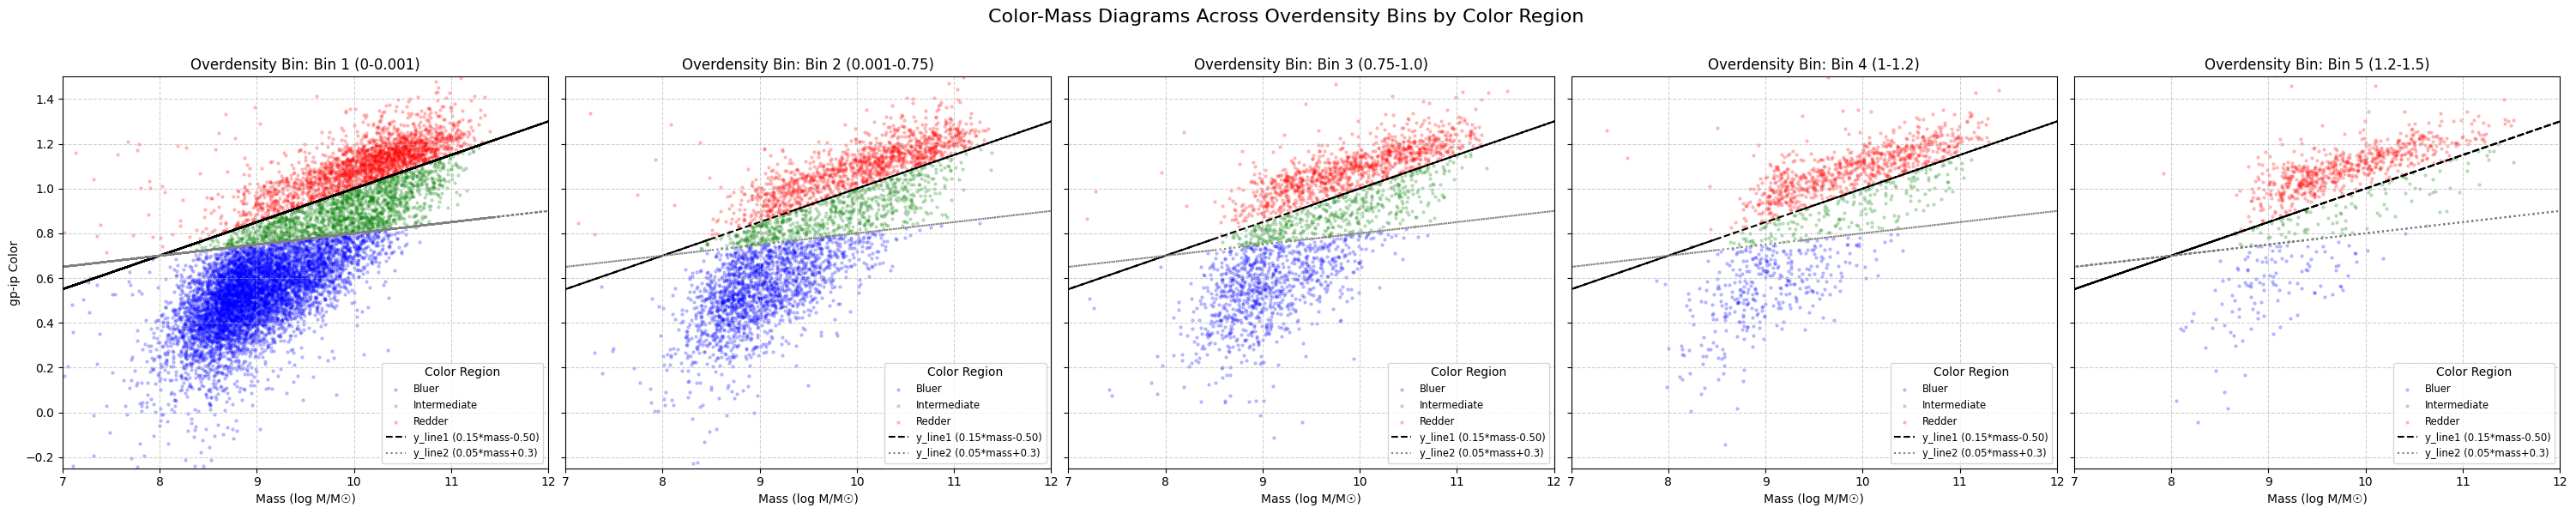


Galaxy counts per color region for each overdensity bin:

Bin 1 (0-0.001):
  Bluer: 6809 galaxies
  Intermediate: 1634 galaxies
  Redder: 2200 galaxies
  Fraction Redder: 0.207

Bin 2 (0.001-0.75):
  Bluer: 1875 galaxies
  Intermediate: 713 galaxies
  Redder: 1303 galaxies
  Fraction Redder: 0.335

Bin 3 (0.75-1.0):
  Bluer: 955 galaxies
  Intermediate: 484 galaxies
  Redder: 1085 galaxies
  Fraction Redder: 0.430

Bin 4 (1-1.2):
  Bluer: 355 galaxies
  Intermediate: 205 galaxies
  Redder: 819 galaxies
  Fraction Redder: 0.594

Bin 5 (1.2-1.5):
  Bluer: 121 galaxies
  Intermediate: 102 galaxies
  Redder: 684 galaxies
  Fraction Redder: 0.754


In [30]:
unique_bins = df_cleaned['overdensity_bin'].unique()
num_bins = len(unique_bins)

# Sort the bins to ensure consistent plotting order
unique_bins = sorted(unique_bins, key=lambda x: str(x))

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, num_bins, figsize=(num_bins * 6, 6), sharey=True, sharex=True)

# Ensure axes is an array even if there's only one subplot
if num_bins == 1:
    axes = [axes]

# Define colors for the color regions
color_map = {
    'Bluer': 'blue',
    'Intermediate': 'green',
    'Redder': 'red'
}

# Prepare to store counts for each overdensity bin
color_region_counts = {}

for i, bin_name in enumerate(unique_bins):
    ax = axes[i]
    bin_data = df_cleaned[df_cleaned['overdensity_bin'] == bin_name]

    # Initialize counts for the current bin
    color_region_counts[bin_name] = {}

    # Plot galaxies for each color region within the current bin
    for region, color in color_map.items():
        region_data = bin_data[bin_data['color_region'] == region]
        ax.scatter(region_data['mass'], region_data['gp-ip'], s=5, alpha=0.2, color=color, label=region)
        color_region_counts[bin_name][region] = len(region_data)

    # Plot the diagonal lines on each subplot
    ax.plot(df_cleaned['mass'], df_cleaned['y_line1'], color='black', linestyle='--', linewidth=1.5, label='y_line1 (0.15*mass-0.50)')
    ax.plot(df_cleaned['mass'], df_cleaned['y_line2'], color='gray', linestyle=':', linewidth=1.5, label='y_line2 (0.05*mass+0.3)')

    # Set title and labels
    ax.set_title(f'Overdensity Bin: {bin_name}')
    ax.set_xlabel('Mass (log M/M☉)')
    if i == 0: # Only set ylabel for the first subplot to avoid redundancy
        ax.set_ylabel('gp-ip Color')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(title='Color Region', loc='lower right', fontsize='small')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.ylim(-0.25, 1.5)
plt.xlim(7, 12)
plt.suptitle('Color-Mass Diagrams Across Overdensity Bins by Color Region', y=1.02, fontsize=16)
plt.show()

print("\nGalaxy counts per color region for each overdensity bin:")
for bin_name, counts in color_region_counts.items():
    print(f"\n{bin_name}:")
    total_in_bin = sum(counts.values())
    red_fraction = counts.get('Redder', 0) / total_in_bin if total_in_bin > 0 else 0
    for region, count in counts.items():
        print(f"  {region}: {count} galaxies")
    print(f"  Fraction Redder: {red_fraction:.3f}")

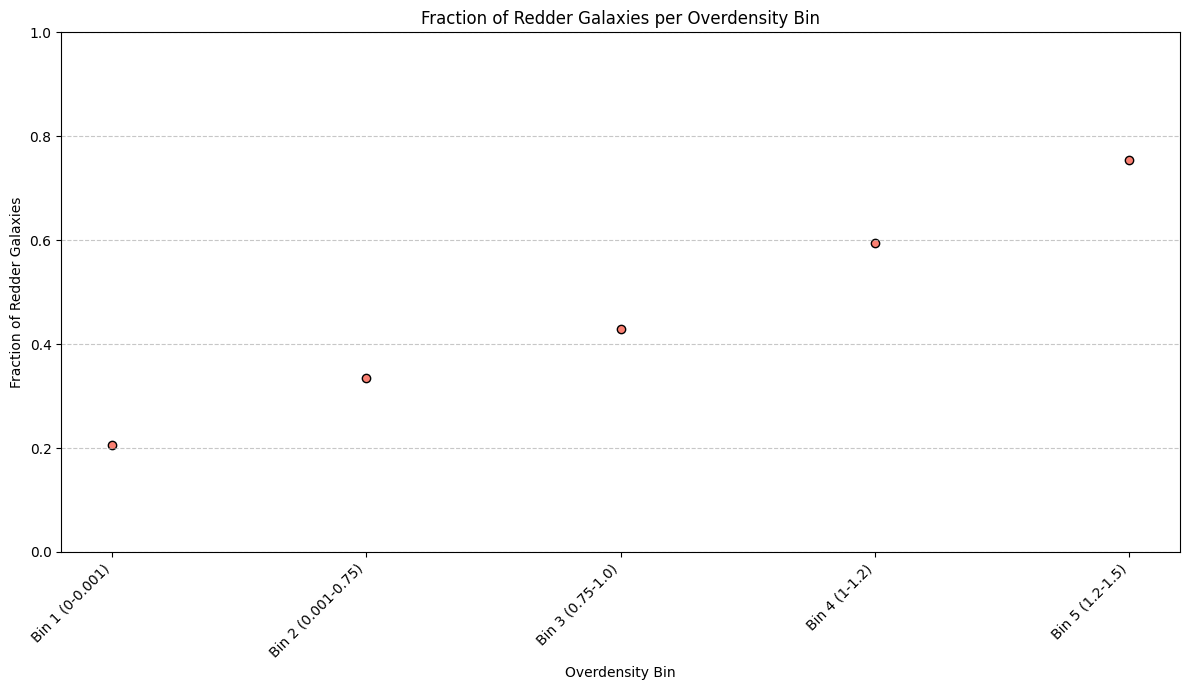

In [31]:
import matplotlib.pyplot as plt

# Prepare data for plotting
bin_labels = []
red_fractions = []

for bin_name, counts in color_region_counts.items():
    bin_labels.append(bin_name)
    total_in_bin = sum(counts.values())
    red_fraction = counts.get('Redder', 0) / total_in_bin if total_in_bin > 0 else 0
    red_fractions.append(red_fraction)

# Create the bar plot
plt.figure(figsize=(12, 7))
plt.scatter(bin_labels, red_fractions, color='salmon', edgecolor='black')
plt.xlabel('Overdensity Bin')
plt.ylabel('Fraction of Redder Galaxies')
plt.title('Fraction of Redder Galaxies per Overdensity Bin')
plt.ylim(0, 1) # Fraction ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [32]:
import numpy as np
import pandas as pd

# 1. Calculate 11 quantile edges for the 'mass' column to create 12 bins
quantiles = [i/12 for i in range(1, 12)]
quantile_edges_mass = df_cleaned['mass'].quantile(quantiles)

# 2. Define the bins for pd.cut()
bins_mass = [-np.inf] + quantile_edges_mass.tolist() + [np.inf]

# 3. Create labels for the 12 bins
labels_mass = [f'Mass Bin {i}' for i in range(1, 13)]

# 4. Use pd.cut() to create a new column named 'mass_bin'
df_cleaned['mass_bin'] = pd.cut(
    df_cleaned['mass'],
    bins=bins_mass,
    labels=labels_mass,
    include_lowest=True,
    duplicates='drop'
)

# 5. Print the calculated quantile edges
print("Quantile Edges for 'mass':")
print(quantile_edges_mass)

# 6. Print the value counts for the new 'mass_bin' column
print("\nValue counts for 'mass_bin':")
print(df_cleaned['mass_bin'].value_counts())

Quantile Edges for 'mass':
0.083333     8.529212
0.166667     8.721046
0.250000     8.869196
0.333333     9.011609
0.416667     9.164679
0.500000     9.335740
0.583333     9.534970
0.666667     9.760244
0.750000    10.006586
0.833333    10.269091
0.916667    10.571838
Name: mass, dtype: float64

Value counts for 'mass_bin':
mass_bin
Mass Bin 1     1612
Mass Bin 2     1612
Mass Bin 3     1612
Mass Bin 4     1612
Mass Bin 5     1612
Mass Bin 6     1612
Mass Bin 7     1612
Mass Bin 8     1612
Mass Bin 9     1612
Mass Bin 10    1612
Mass Bin 11    1612
Mass Bin 12    1612
Name: count, dtype: int64


In [33]:
red_fraction_per_mass_bin = {}

unique_mass_bins = df_cleaned['mass_bin'].unique()

for mass_bin_name in unique_mass_bins:
    # Filter data for the current mass bin
    bin_data = df_cleaned[df_cleaned['mass_bin'] == mass_bin_name]

    # Count total galaxies in the bin
    total_galaxies_in_bin = len(bin_data)

    # Count 'Redder' galaxies in the bin
    redder_galaxies_in_bin = len(bin_data[bin_data['color_region'] == 'Redder'])

    # Calculate the fraction of 'Redder' galaxies
    if total_galaxies_in_bin > 0:
        red_fraction = redder_galaxies_in_bin / total_galaxies_in_bin
    else:
        red_fraction = 0.0 # Handle case where a bin might be empty

    # Store the result
    red_fraction_per_mass_bin[mass_bin_name] = red_fraction

# Print the results
print("Red Fraction per Mass Bin:")
for bin_name, fraction in red_fraction_per_mass_bin.items():
    print(f"  {bin_name}: {fraction:.3f}")

Red Fraction per Mass Bin:
  Mass Bin 7: 0.301
  Mass Bin 12: 0.736
  Mass Bin 9: 0.450
  Mass Bin 5: 0.208
  Mass Bin 4: 0.114
  Mass Bin 8: 0.367
  Mass Bin 10: 0.559
  Mass Bin 1: 0.047
  Mass Bin 3: 0.059
  Mass Bin 2: 0.035
  Mass Bin 6: 0.259
  Mass Bin 11: 0.643


/tmp/ipython-input-3711825854.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_mass_bins)) # Get a colormap for distinct colors


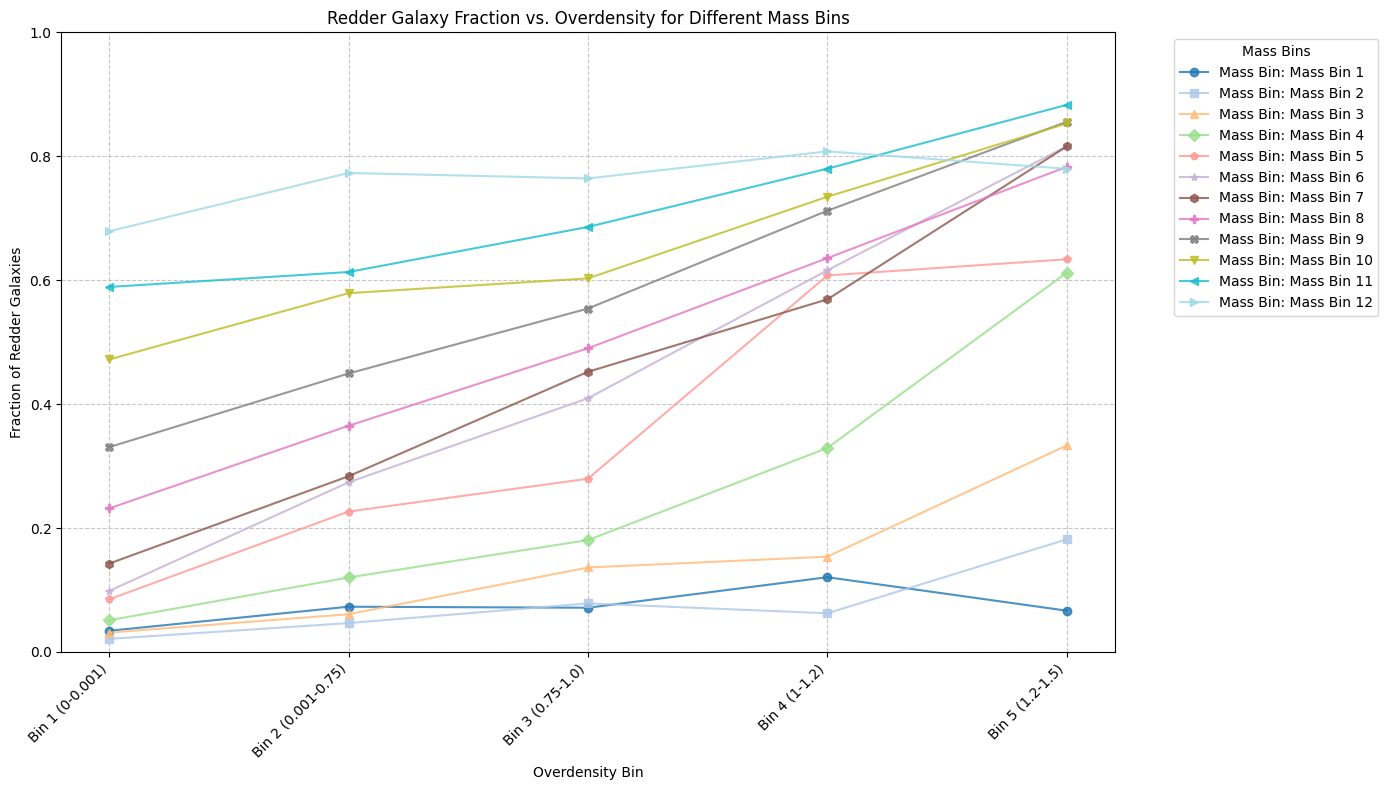


Red Fraction per Mass Bin per Overdensity Bin:

Bin 1 (0-0.001):
  Mass Bin 1: 0.034
  Mass Bin 2: 0.021
  Mass Bin 3: 0.031
  Mass Bin 4: 0.051
  Mass Bin 5: 0.085
  Mass Bin 6: 0.099
  Mass Bin 7: 0.143
  Mass Bin 8: 0.232
  Mass Bin 9: 0.331
  Mass Bin 10: 0.472
  Mass Bin 11: 0.589
  Mass Bin 12: 0.679

Bin 2 (0.001-0.75):
  Mass Bin 1: 0.073
  Mass Bin 2: 0.047
  Mass Bin 3: 0.061
  Mass Bin 4: 0.120
  Mass Bin 5: 0.227
  Mass Bin 6: 0.274
  Mass Bin 7: 0.284
  Mass Bin 8: 0.365
  Mass Bin 9: 0.449
  Mass Bin 10: 0.579
  Mass Bin 11: 0.613
  Mass Bin 12: 0.773

Bin 3 (0.75-1.0):
  Mass Bin 1: 0.071
  Mass Bin 2: 0.078
  Mass Bin 3: 0.136
  Mass Bin 4: 0.181
  Mass Bin 5: 0.280
  Mass Bin 6: 0.409
  Mass Bin 7: 0.452
  Mass Bin 8: 0.490
  Mass Bin 9: 0.554
  Mass Bin 10: 0.603
  Mass Bin 11: 0.686
  Mass Bin 12: 0.764

Bin 4 (1-1.2):
  Mass Bin 1: 0.121
  Mass Bin 2: 0.062
  Mass Bin 3: 0.154
  Mass Bin 4: 0.329
  Mass Bin 5: 0.608
  Mass Bin 6: 0.616
  Mass Bin 7: 0.569
  Mass Bi

In [34]:
import matplotlib.pyplot as plt

red_fraction_by_overdensity_mass = {}

unique_overdensity_bins = df_cleaned['overdensity_bin'].unique()
unique_mass_bins = df_cleaned['mass_bin'].unique()

# Sort the bins for consistent output order and plotting
unique_overdensity_bins = sorted(unique_overdensity_bins, key=lambda x: str(x))
unique_mass_bins = sorted(unique_mass_bins, key=lambda x: int(x.split()[-1]))

for od_bin_name in unique_overdensity_bins:
    red_fraction_by_overdensity_mass[od_bin_name] = {}
    for m_bin_name in unique_mass_bins:
        # Filter data for the current overdensity and mass bin combination
        subset_data = df_cleaned[
            (df_cleaned['overdensity_bin'] == od_bin_name) &
            (df_cleaned['mass_bin'] == m_bin_name)
        ]

        # Count total galaxies in the subset
        total_galaxies_in_subset = len(subset_data)

        # Count 'Redder' galaxies in the subset
        redder_galaxies_in_subset = len(subset_data[subset_data['color_region'] == 'Redder'])

        # Calculate the fraction of 'Redder' galaxies
        if total_galaxies_in_subset > 0:
            red_fraction = redder_galaxies_in_subset / total_galaxies_in_subset
        else:
            red_fraction = 0.0 # Handle case where a sub-bin might be empty

        # Store the result
        red_fraction_by_overdensity_mass[od_bin_name][m_bin_name] = red_fraction

# --- Plotting Section ---
plt.figure(figsize=(14, 8))
markers = ['o', 's', '^', 'D', 'p', '*', 'h', 'P', 'X', 'v', '<', '>'] # More markers for 12 mass bins
colors = plt.cm.get_cmap('tab20', len(unique_mass_bins)) # Get a colormap for distinct colors

for j, m_bin_name in enumerate(unique_mass_bins):
    # Collect red fractions for the current mass bin across all overdensity bins
    red_fractions_for_mass_bin = []
    for od_bin_name in unique_overdensity_bins:
        red_fractions_for_mass_bin.append(red_fraction_by_overdensity_mass[od_bin_name][m_bin_name])

    plt.plot(unique_overdensity_bins, red_fractions_for_mass_bin,
             marker=markers[j % len(markers)], # Cycle through markers if there are more mass bins than markers
             color=colors(j),
             linestyle='-', # Connect points with lines
             label=f'Mass Bin: {m_bin_name}',
             alpha=0.8)

plt.xlabel('Overdensity Bin')
plt.ylabel('Fraction of Redder Galaxies')
plt.title('Redder Galaxy Fraction vs. Overdensity for Different Mass Bins')
plt.ylim(0, 1) # Fraction ranges from 0 to 1
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='Mass Bins', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.tight_layout()
plt.show()

# --- Printing Results Section (kept for detailed output) ---
print("\nRed Fraction per Mass Bin per Overdensity Bin:")
for od_bin, mass_fractions in red_fraction_by_overdensity_mass.items():
    print(f"\n{od_bin}:")
    for m_bin, fraction in mass_fractions.items():
        print(f"  {m_bin}: {fraction:.3f}")